Pitney Bowes Tech Screen

Melissa DiMaio, melissa.dimaio47@myhunter.cuny.edu

1. 

In [1]:
#I'm using IBM Watson Studio which has this built-in code snippet to import and read csv files
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

client_bdba9a94a0ea41e087eb6fdde538ddf9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='u688cKP6sQbtMCU5s5KrFkqEJg2XGYwsTDL_0gyNKG3h',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_bdba9a94a0ea41e087eb6fdde538ddf9.get_object(Bucket='pitneybowestechscreen-donotdelete-pr-lmd6rxjq8sdu10',Key='sales_data.csv')['Body']

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

sales_data = pd.read_csv(body)
sales_data.head()


,Invoice ID,Gender,Product line,Quantity,Spend,Predicted_Gender,Date
0,750-67-8428,1,Health and beauty,7,548.9715,1,1/5/19
1,226-31-3081,1,Electronic accessories,5,80.2200,1,3/8/19
2,631-41-3108,0,Home and lifestyle,7,340.5255,0,3/3/19
3,123-19-1176,0,Health and beauty,8,489.0480,0,1/27/19
4,373-73-7910,0,Sports and travel,7,634.3785,0,2/8/19


In [2]:
#group by product line and sum over spend to get the product line with the greatest overall spend
grouped = sales_data.groupby("Product line", as_index=False)["Spend"].sum()
grouped[grouped['Spend']==grouped['Spend'].max()]

,Product line,Spend
2,Food and beverages,56144.844


2.

In [3]:
#first need to see which data type the date column is
sales_data.dtypes

Invoice ID           object
Gender                int64
Product line         object
Quantity              int64
Spend               float64
Predicted_Gender      int64
Date                 object
dtype: object

In [4]:
#convert from object to datetime so it'll be in the right order when sorted
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [5]:
#finally output the first 60 rows sorted by date and spend 
sales_data[sales_data["Product line"] == "Food and beverages"].sort_values(["Date", "Spend"], ascending = (True,False)).head(60)

,Invoice ID,Gender,Product line,Quantity,Spend,Predicted_Gender,Date
970,746-04-1077,1,Food and beverages,10,888.6150,0,2019-01-01
856,770-42-8960,0,Food and beverages,8,177.4080,0,2019-01-01
558,712-39-0363,0,Food and beverages,6,262.4580,0,2019-01-02
544,841-18-8232,1,Food and beverages,1,74.7600,1,2019-01-05
70,393-65-2792,0,Food and beverages,10,939.5400,0,2019-01-06
384,662-72-2873,1,Food and beverages,5,214.9350,1,2019-01-06
355,889-04-9723,1,Food and beverages,4,374.3880,1,2019-01-07
580,390-31-6381,0,Food and beverages,3,85.7430,0,2019-01-07
267,571-94-0759,1,Food and beverages,10,783.3000,1,2019-01-08
848,845-94-6841,1,Food and beverages,9,688.7160,0,2019-01-08


3.

In [6]:
#first subtract 7 days from each date or else grouping by week returns the following monday instead of the previous one, then group by week 
sales_data['Week'] = pd.to_datetime(sales_data['Date']) - pd.to_timedelta(7, unit='d')
by_week = sales_data.groupby([pd.Grouper(key='Week', freq='W-MON')])["Invoice ID"].count().reset_index()
by_week

,Week,Invoice ID
0,2018-12-31,64
1,2019-01-07,77
2,2019-01-14,77
3,2019-01-21,99
4,2019-01-28,80
5,2019-02-04,89
6,2019-02-11,71
7,2019-02-18,69
8,2019-02-25,83
9,2019-03-04,87


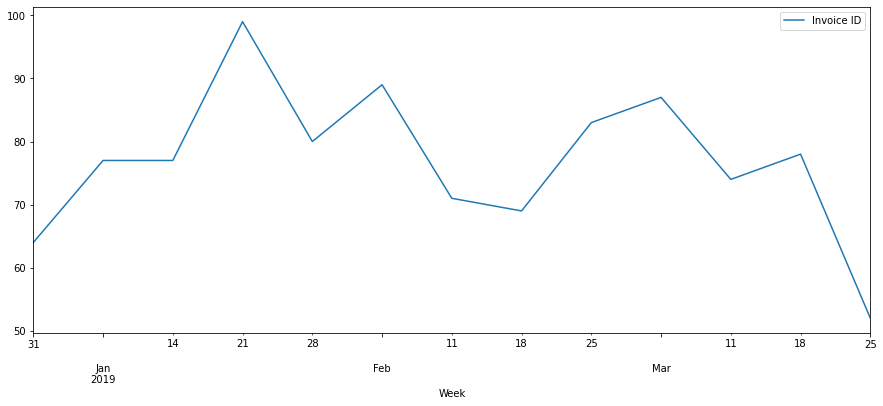

In [7]:
#then plot!
import matplotlib.pyplot as plt

by_week.plot(x='Week', y='Invoice ID', kind='line', figsize=(15, 6))

plt.show()

4.

In [8]:
#find the average by grouping by gender and taking the mean over quantity
sales_data.groupby("Gender", as_index=False)["Quantity"].mean()

,Gender,Quantity
0,0,5.292585
1,1,5.726547


In [9]:
#to decide whether the difference is significant, first I want to see how many data points there are from each gender
#this points to the difference being significant because we have a large number of samples, meaning the law of large nubmers applies and 
#the difference in means isn't just caused by small sample size 
sales_data.groupby("Gender", as_index=False)["Invoice ID"].count()

,Gender,Invoice ID
0,0,499
1,1,501


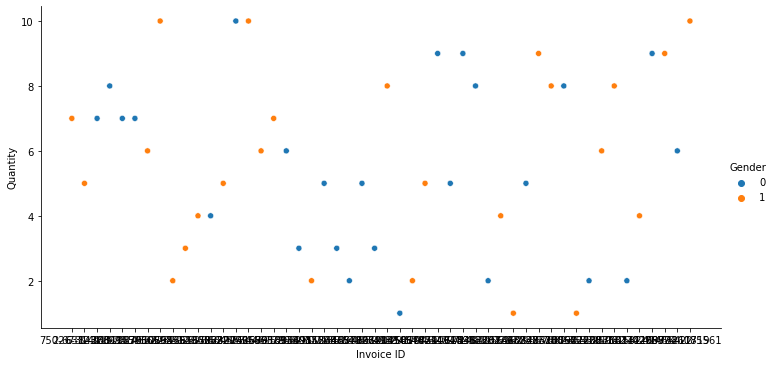

In [10]:
#then I decided to plot the first 50 data points to see how the points are varied, they look to be varied about equally.
#it's starting to look like the difference isn't too significant after all
import seaborn as sns
sns.relplot(data=sales_data.head(50), x='Invoice ID', y='Quantity', hue='Gender', hue_order=[0,1], aspect=2)
plt.show()

In [11]:
#now to settle this once and for all I want to see how well I can predict gender based on quantity by doing some quick naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [12]:
#splitting into x and y and then train and test set
x = sales_data['Quantity'].values.reshape(-1, 1)
y = sales_data['Gender'].values.reshape(-1,1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [14]:
#doing that naive Bayes
from sklearn.naive_bayes import CategoricalNB
bayes = CategoricalNB()
bayes.fit(x_train,y_train)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


CategoricalNB()

In [15]:
yhat = bayes.predict(x_test)
cf_matrix = confusion_matrix(y_test, yhat)

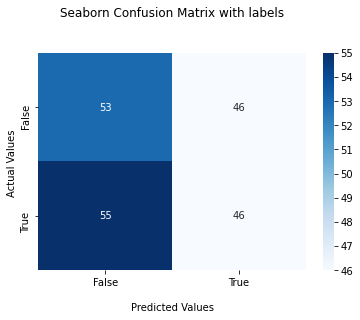

In [16]:
#plotting confusion matrix
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [17]:
#the predictions are about 50/50 which leads me to conclude that the difference is not super significant 

5.

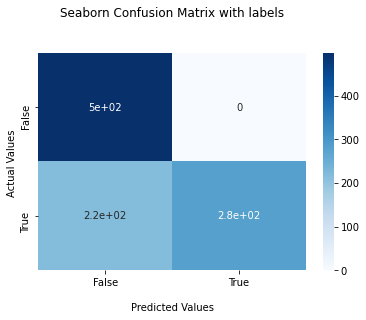

In [18]:
#plotting confusions matrix of actual gender and predicted gender. it looks like the predictions over-predicts gender 0  
cf_matrix = confusion_matrix(sales_data["Gender"], sales_data["Predicted_Gender"])

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()


6.

A favorite technique of mine is regression (linear, logisitc, or otherwise). Being a math person, any technique that takes you back to stats class is a technique that is near and dear to my heart. I used these techniques extensively in my IBM Data Science Certification. In one instance, I used logistic regression for a binary classification problem where I uses several attributes of people who took out loans, such as principal amount, age, and education level, to predict whether or not they would pay back the loan by the due date.   